##  <b>Plant Seedling Classification

### **Context:**

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.




### **Objective:**

The aim of this project is to **Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.**


### **Data Description:**
The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet




####**Note: Please use GPU runtime to execute the code efficiently** 


## Importing necessary libraries

In [60]:
# Matrix opperations
import numpy as np   
# Efficient Data Stractures
import pandas as pd         
# Graphics and Visualization
import matplotlib.pyplot as plt   
from matplotlib import pyplot
# Mathematical Operations
import math         
# Image Processing - OpenCV
import cv2           
# File Operations
from glob import glob    
import itertools
# for plotting graphs
import seaborn as sns  
# To verify the current directory in python.
import os
# Display images using OpenCV
from google.colab.patches import cv2_imshow

# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
import tensorflow as tf
 # Importing the optimizers which can be used in our model
from tensorflow.keras.optimizers import Adam,SGD   

# ImageDataGenerator for data augmentation
from keras.preprocessing.image import ImageDataGenerator      
# Sequential module to define a sequential model
from keras.models import Sequential,  load_model
# Defining all the layers to build our CNN Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D    

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
# Convert to one-hot-encoding
from keras.utils.np_utils import to_categorical 

# Train_test_split function to split the data into train and test
from sklearn.model_selection import train_test_split
# Confusion_matrix to plot the confusion matrix
from sklearn.metrics import confusion_matrix
# Preprocessing module to preprocess the data
from sklearn import preprocessing                                                                



# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Mounting drive

In [3]:
# Mounting Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read the dataset

In [4]:
# Loading the image file of dataset
path_images = '/content/drive/MyDrive/02. Artificial Inteligence and Machine Learning/04. Introduction to Computer Vision/03. Project/images.npy'
images = np.load(path_images)     

# Loading the labels file of dataset
path_csv = '/content/drive/MyDrive/02. Artificial Inteligence and Machine Learning/04. Introduction to Computer Vision/03. Project/Labels.csv'
labels = pd.read_csv(path_csv)  

In [5]:
# Verifying the current directory og the database.
print(os.path.abspath("path_csv"))  

/content/path_csv


## **Data Overview**

- Check the shape of images and the labels in the data
- Converting images from BGR to RGB

### Checking the shape of the dataset

In [6]:
# Printing the sahpw of the Images
print(images.shape)
# Printing the sahpw of the Labels
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


### Converting the BGR images to RGB images.

Plotting images using OpenCV and matplotlib

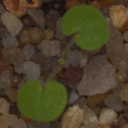

In [7]:
# Showing a random image with OpenCV
cv2_imshow(images[5])

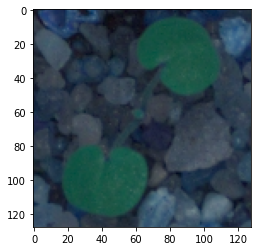

In [8]:
# Showing a random image with Matplotlib
plt.imshow(images[5])

* We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.

* Now we will convert these BGR images to RGB images so we could interpret them easily.

In [9]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better. 
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [10]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(15, 10))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

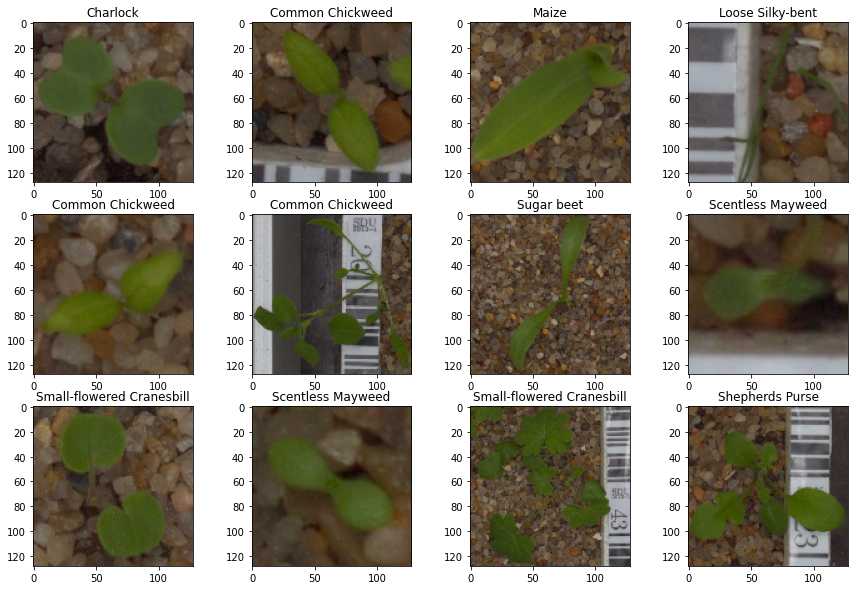

In [11]:
# Ploting all 12 labels from every image category
plot_images(images,labels)

**Checking for data impalance**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

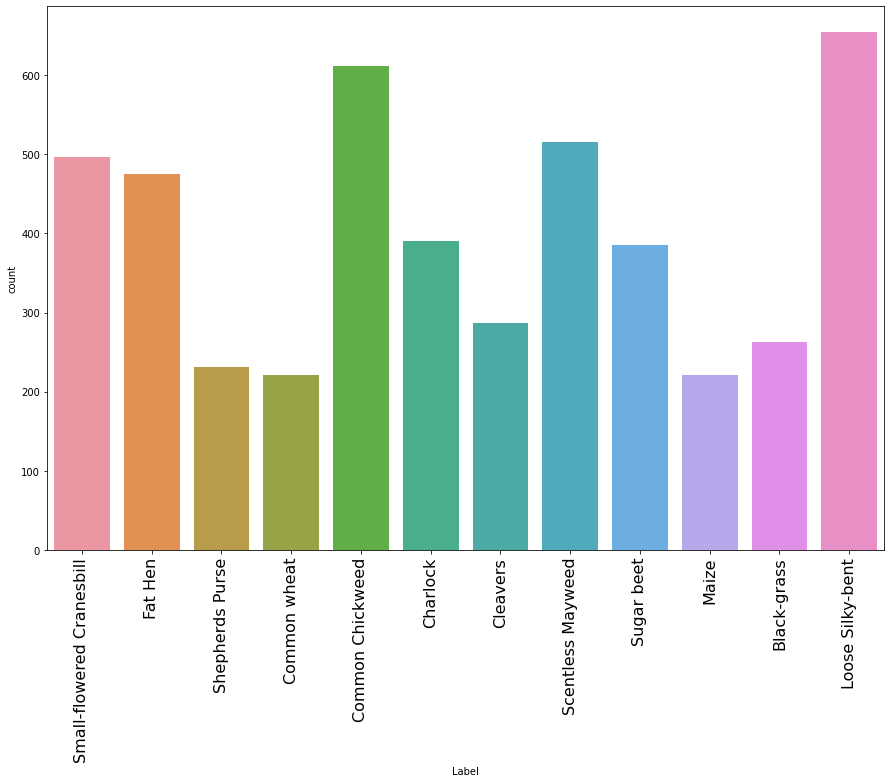

In [64]:
# Ploting with countplot from seaborn
fig, ax = pyplot.subplots(figsize=(15, 10))
sns.countplot(labels['Label'])
# Set the rotation of the labels on 'x' axe to vertical
plt.xticks(rotation='vertical', fontsize=16)


In [13]:
# Using numpy to finf the concrete number of images at every label
x = labels.Label
unique, counts = np.unique(x, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[['Black-grass' 263]
 ['Charlock' 390]
 ['Cleavers' 287]
 ['Common Chickweed' 611]
 ['Common wheat' 221]
 ['Fat Hen' 475]
 ['Loose Silky-bent' 654]
 ['Maize' 221]
 ['Scentless Mayweed' 516]
 ['Shepherds Purse' 231]
 ['Small-flowered Cranesbill' 496]
 ['Sugar beet' 385]]


* As we can see from the above plot and the results below, the dataset is imbalanced.
* There are plants with more than 600 images in one category (Loose Silky-bent: 654, Common Chickweed:611), and some with less than 250 (Shepherds Purse:231, Common wheat:221, Maize:221 ).

### Resizing images 
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

**In our case we used firstly 64, but afterwards for better results we resize to 128 * 128.**

In [14]:
images_decreased=[]
height = 128
width = 128
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

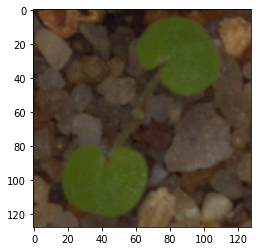

In [15]:
plt.imshow(images_decreased[5])

**Visualizing images using Gaussian Blur**

In [16]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

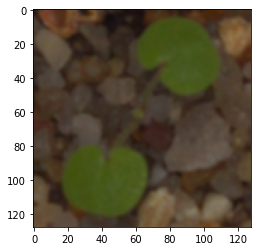

In [17]:
plt.imshow(images_gb[5])

It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.


## **Data Preparation for modeling**

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

### Splitting the dataset

* As we have less images in our dataset, we will only use 10% of our data for 
testing, 10% of our data for validation and 80% of our data for training.
* We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [18]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels, test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [19]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)
print(X_temp.shape,y_temp.shape)

(3847, 128, 128, 3) (3847, 1)
(428, 128, 128, 3) (428, 1)
(475, 128, 128, 3) (475, 1)
(4275, 128, 128, 3) (4275, 1)


### Making Data Compatible


* Convert labels from names to one hot vectors
* Normalizing the values

### Encoding the target labels

In [20]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normalization (Scaling)

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.



In [21]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## **Model Building - Convolutional Neural Network (CNN)**


First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.



#### Clearing the backend session and initializing the random seed values

In [22]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#### Buidling Model (CNN)

In [23]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a CNN Model with the following 2 main parts -

* The Feature Extraction layers which are comprised of convolutional and pooling layers.
* The Fully Connected classification layers for prediction.

#### Summary of the model

In [24]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 16 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

As we can see from the above summary, this CNN model will train and learn 1,099,171 parameters (weights and biases).

Let's now compile and train the model using the train data. Here, we are using the loss function - categorical_crossentropy as this is a multi-class classification problem. We will try to minimize this loss at every iteration using the optimizer of our choice. Also, we are choosing accuracy as the metric to measure the performance of the model.

#### Fitting the model on the train data

In [25]:
history_1 = model.fit(X_train_normalized, y_train_encoded,epochs=30,validation_data=(X_val_normalized,y_val_encoded),batch_size=32,verbose=2)

Epoch 1/30
121/121 - 17s - loss: 2.4236 - accuracy: 0.1612 - val_loss: 2.2009 - val_accuracy: 0.2897 - 17s/epoch - 142ms/step
Epoch 2/30
121/121 - 5s - loss: 2.2043 - accuracy: 0.2555 - val_loss: 2.0735 - val_accuracy: 0.3014 - 5s/epoch - 45ms/step
Epoch 3/30
121/121 - 5s - loss: 2.0219 - accuracy: 0.2948 - val_loss: 1.8646 - val_accuracy: 0.3458 - 5s/epoch - 45ms/step
Epoch 4/30
121/121 - 5s - loss: 1.8778 - accuracy: 0.3434 - val_loss: 1.6291 - val_accuracy: 0.4159 - 5s/epoch - 45ms/step
Epoch 5/30
121/121 - 5s - loss: 1.7334 - accuracy: 0.3754 - val_loss: 1.5391 - val_accuracy: 0.4626 - 5s/epoch - 45ms/step
Epoch 6/30
121/121 - 5s - loss: 1.6264 - accuracy: 0.4167 - val_loss: 1.4162 - val_accuracy: 0.4790 - 5s/epoch - 45ms/step
Epoch 7/30
121/121 - 5s - loss: 1.5582 - accuracy: 0.4531 - val_loss: 1.3923 - val_accuracy: 0.5210 - 5s/epoch - 45ms/step
Epoch 8/30
121/121 - 5s - loss: 1.4322 - accuracy: 0.4804 - val_loss: 1.2304 - val_accuracy: 0.5841 - 5s/epoch - 45ms/step
Epoch 9/30
12

#### Model Evaluation

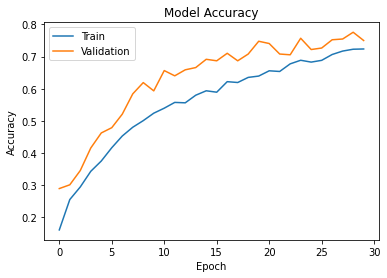

In [26]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

* We can see from the above plot that the validation accuracy of the model was good but the training accuracy was not good.
* The model seems not to overfit on the data.

#### Evaluating the model on test data

In [27]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.9385 - accuracy: 0.7558 - 735ms/epoch - 49ms/step


#### Generating the predictions using test data

In [28]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 17ms/step


In [29]:
y_pred

array([[2.0782325e-21, 1.8299827e-11, 7.7938723e-12, ..., 5.9612170e-02,
        8.6846808e-03, 1.8344360e-06],
       [1.9723576e-20, 2.9603200e-07, 1.0509698e-08, ..., 4.9235138e-07,
        9.9997950e-01, 4.3712173e-10],
       [5.8718930e-18, 6.6481306e-07, 6.0189265e-08, ..., 1.8671498e-04,
        9.9860746e-01, 6.6239522e-08],
       ...,
       [2.7462286e-01, 6.1709097e-12, 4.3047064e-07, ..., 7.2604093e-12,
        3.3535350e-09, 1.2486582e-05],
       [2.7797853e-08, 1.4519914e-04, 7.9567872e-05, ..., 3.0616160e-02,
        2.2610373e-05, 3.5486035e-03],
       [2.8447344e-14, 8.4440660e-05, 2.3916984e-05, ..., 4.4857230e-02,
        2.6137483e-01, 8.1700739e-03]], dtype=float32)

#### Plot the Confusion Matrix





*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





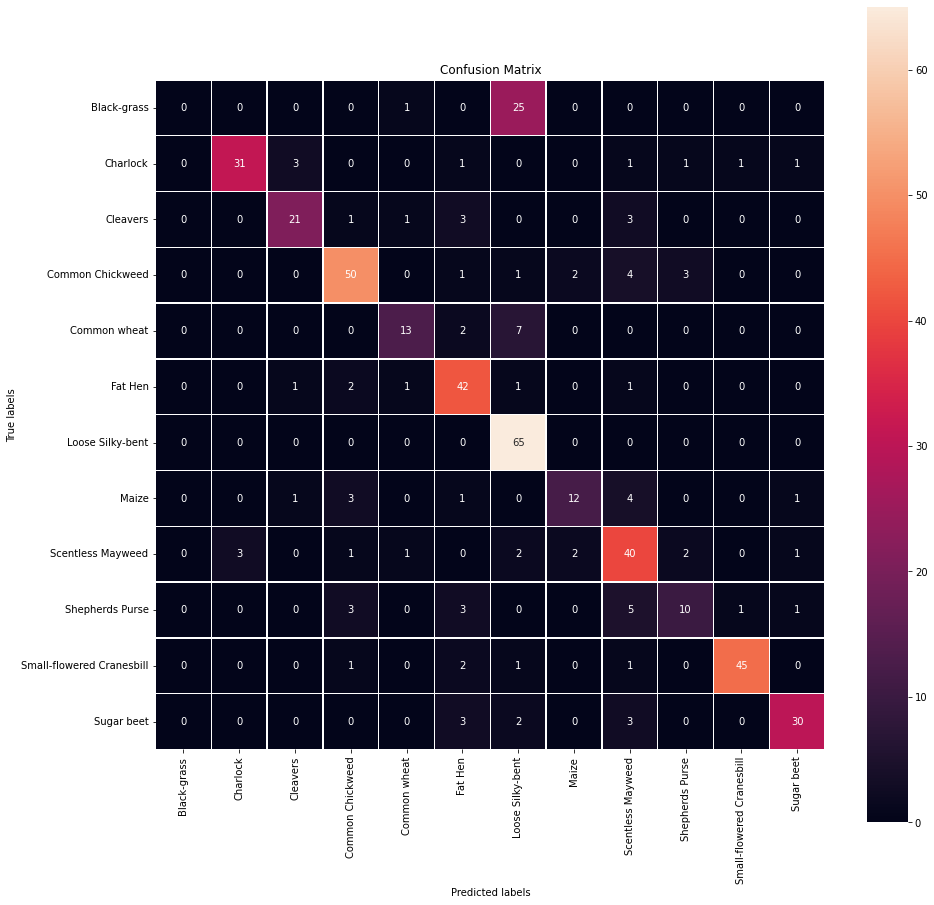

In [30]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=0)
plt.show()

**Observations**:

* We observe that some of the classes are not predicted correctly.
* Some classes have disappointing results as Black-grass 
* Additionally, Common Wheat is totally misclassified.
* In comparison to the rest, we can see that classes as Loose Silky-bent and Common Chickweed are well classified.

#### Plot Classification Report





In [31]:
# Plotting the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.91      0.79      0.85        39
           2       0.81      0.72      0.76        29
           3       0.82      0.82      0.82        61
           4       0.76      0.59      0.67        22
           5       0.72      0.88      0.79        48
           6       0.62      1.00      0.77        65
           7       0.75      0.55      0.63        22
           8       0.65      0.77      0.70        52
           9       0.62      0.43      0.51        23
          10       0.96      0.90      0.93        50
          11       0.88      0.79      0.83        38

    accuracy                           0.76       475
   macro avg       0.71      0.69      0.69       475
weighted avg       0.73      0.76      0.73       475



**Observations**:

for this model with Base CNN we can see that it's a quit good model so we have to keep searching for a better one by using another technics.

### Deleting the model and history variable to use the RAM efficiently

In [32]:
# Complete the code to delete the model1
del model   

# Complete the code to delete the history_1 variable
del history_1     

# **Improving the Base Model using Data Augmentation and Regularization**




**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [33]:
from keras.callbacks import ReduceLROnPlateau

# Complete the code to monitor val_accuracy 
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

## Data Augmentation


Remember, **data augmentation should not be used in the validation/test data set**.

### Clearing the backend session and initializing the random seed values

In [34]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Buidling Model_2

In [35]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [36]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())


model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# using Batch Normalization
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

### Fitting the model on the train data

In [37]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history_2 = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 14s 210ms/step - loss: 2.3672 - accuracy: 0.1565 - val_loss: 2.4325 - val_accuracy: 0.1799 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 12s 195ms/step - loss: 2.0529 - accuracy: 0.2873 - val_loss: 2.3286 - val_accuracy: 0.2593 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 12s 198ms/step - loss: 1.6900 - accuracy: 0.4163 - val_loss: 2.2159 - val_accuracy: 0.3107 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 12s 195ms/step - loss: 1.4977 - accuracy: 0.4771 - val_loss: 2.2150 - val_accuracy: 0.2827 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 12s 200ms/step - loss: 1.3456 - accuracy: 0.5340 - val_loss: 2.1417 - val_accuracy: 0.2336 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 12s 196ms/step - loss: 1.2524 - accuracy: 0.5691 - val_loss: 1.6452 - val_accuracy: 0.5304 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 12s 195ms/st

### Model Evaluation

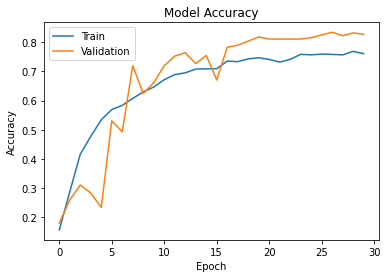

In [38]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observation**

* We can see from the above plot that the validation accuracy of the model is good but the training accuracy was okayish.
* The model doesn't seem to overfit on the data.

### Evaluating the model on test data

In [39]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.5989 - accuracy: 0.8337 - 404ms/epoch - 27ms/step


We can observe that our accuracy has improved compared to our previous model.



In [40]:
# Here we would get the output as probablities for each category
y_pred_2=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 6ms/step


### Plotting the Confusion Matrix

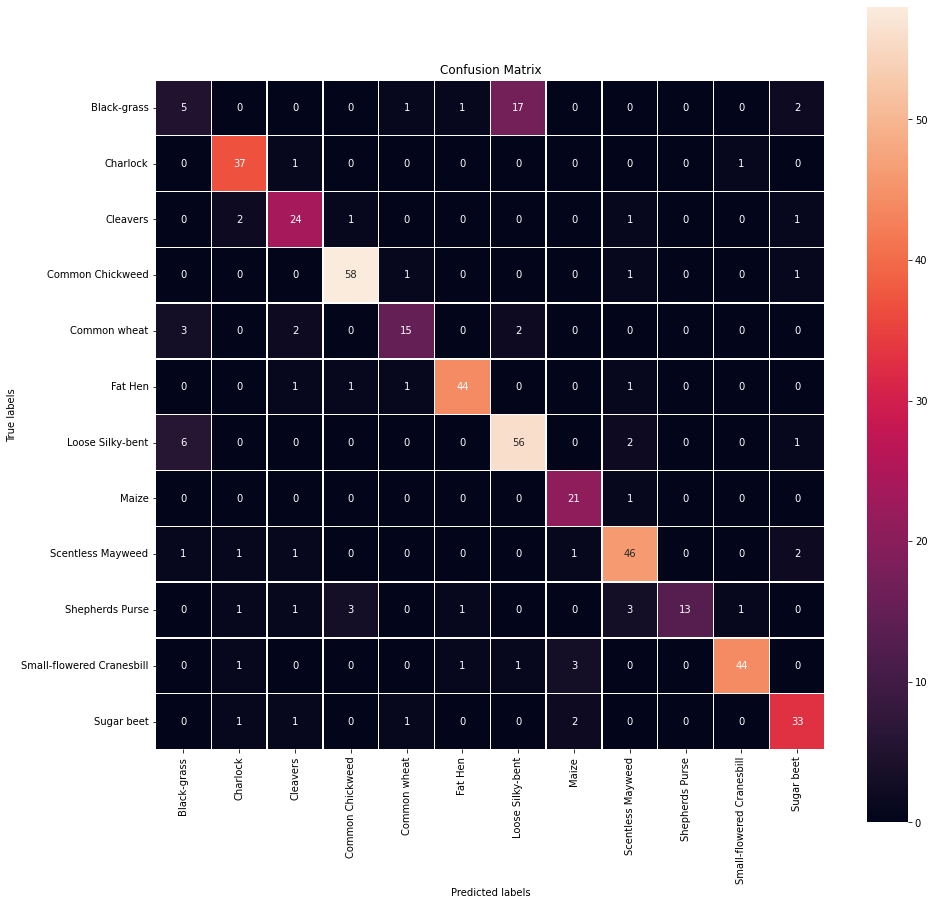

In [41]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_2_arg=np.argmax(y_pred_2,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_2_arg)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=0)
plt.show()

**Observations:**


* The confusion matrix appears to be improving as well.
* Some classes have disappointing results as Black-grass.
* However there is still some confusion with the Shepherds Purse class as previously.
* In comparison to the rest, we can see that classes as Loose Silky-bent and Common Chickweed are well classified.
* We can observe that this model has outperformed our previous model as the rest classes are showing improvement.

### Plot Classification Report

In [42]:
# Plotting the classification report 
cr=metrics.classification_report(y_test_arg, y_pred_2_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.19      0.24        26
           1       0.86      0.95      0.90        39
           2       0.77      0.83      0.80        29
           3       0.92      0.95      0.94        61
           4       0.79      0.68      0.73        22
           5       0.94      0.92      0.93        48
           6       0.74      0.86      0.79        65
           7       0.78      0.95      0.86        22
           8       0.84      0.88      0.86        52
           9       1.00      0.57      0.72        23
          10       0.96      0.88      0.92        50
          11       0.82      0.87      0.85        38

    accuracy                           0.83       475
   macro avg       0.81      0.79      0.79       475
weighted avg       0.83      0.83      0.83       475



**Observations**:

We definetely see better results with the second model and after all the improvements we at this model. From the other hand missclassified from the previous model is not completely disappeared. 

### Visualizing the prediction

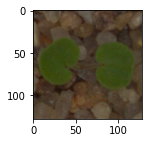

1/1 [==============================] - 0s 87ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


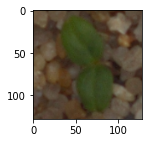

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Cleavers']
True Label Cleavers


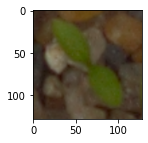

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


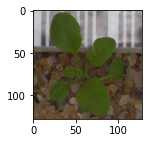

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [43]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

**Observations**

From those 4 random images we have all correct predicted.  

# **Transfer Learning**

## VGG16

**Let's try again, but this time, we will be using the idea of Transfer Learning. We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.**

**For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.**

In [44]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [45]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [46]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [47]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.2))
# new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 15,764,940
Trainable params: 1,050,252
Non-trainable params: 14,714,688
_________________________________________________________________


In [48]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/25
60/60 [==============================] - 18s 261ms/step - loss: 2.0777 - accuracy: 0.2929 - val_loss: 1.6629 - val_accuracy: 0.4369 - lr: 0.0010
Epoch 2/25
60/60 [==============================] - 13s 219ms/step - loss: 1.5563 - accuracy: 0.4837 - val_loss: 1.4027 - val_accuracy: 0.5164 - lr: 0.0010
Epoch 3/25
60/60 [==============================] - 13s 213ms/step - loss: 1.3481 - accuracy: 0.5440 - val_loss: 1.2341 - val_accuracy: 0.5958 - lr: 0.0010
Epoch 4/25
60/60 [==============================] - 13s 214ms/step - loss: 1.1722 - accuracy: 0.6038 - val_loss: 1.1596 - val_accuracy: 0.6121 - lr: 0.0010
Epoch 5/25
60/60 [==============================] - 13s 213ms/step - loss: 1.0995 - accuracy: 0.6281 - val_loss: 1.1529 - val_accuracy: 0.6028 - lr: 0.0010
Epoch 6/25
60/60 [==============================] - 13s 218ms/step - loss: 0.9919 - accuracy: 0.6717 - val_loss: 1.0528 - val_accuracy: 0.6776 - lr: 0.0010
Epoch 7/25
60/60 [==============================] - 13s 216ms/st

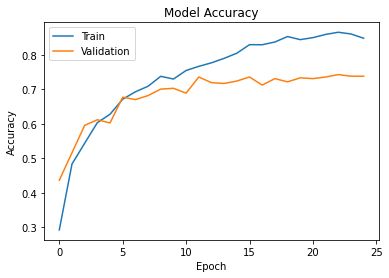

In [49]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observation**

* We can see from the above plot that the training accuracy of the model was good but the validation accuracy was also satisfactory.
* The model looks better than the previous two models.

In [50]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 2s - loss: 0.7648 - accuracy: 0.7368 - 2s/epoch - 139ms/step


In [51]:
# Here we would get the output as probablities for each category
y_pred_new=new_model.predict(X_test_normalized)

15/15 [==============================] - 1s 52ms/step


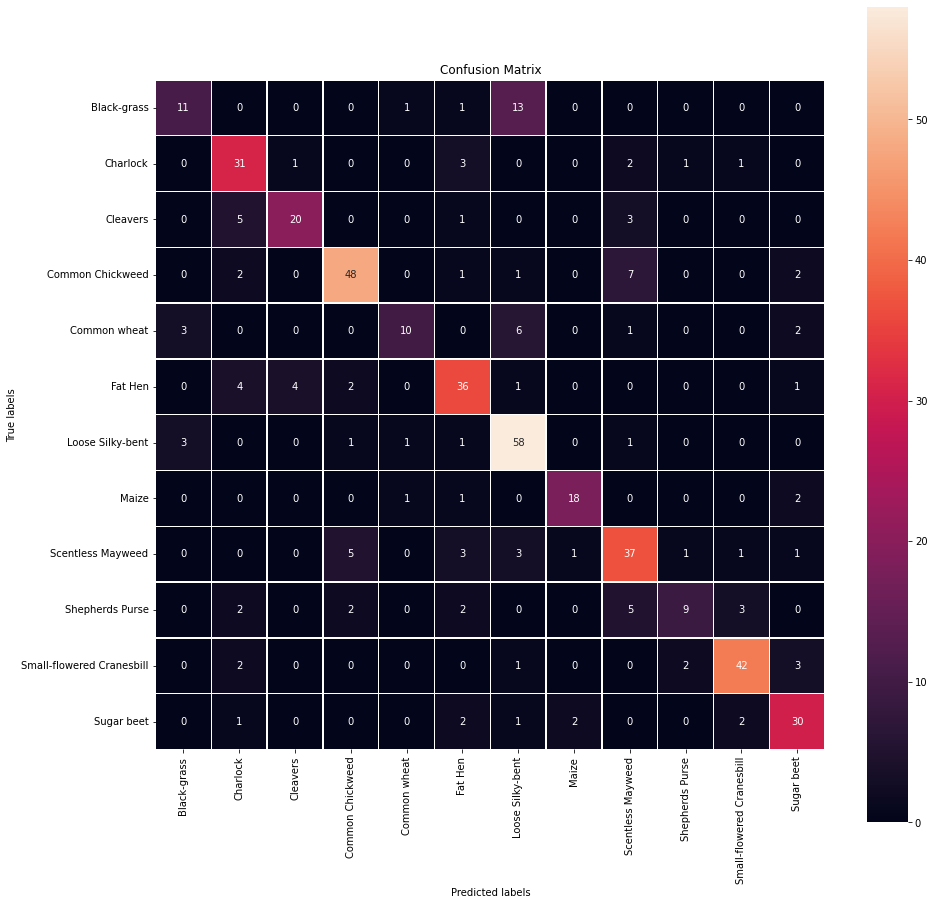

In [52]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_new_arg=np.argmax(y_pred_new,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_new_arg)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=0)
plt.show()

**Observations:**


* According to the confusion matrix and accuracy curve, the VGG16 model has outperformed Model-2.
* Thus we can say that VGG16 is our best model and we can use this model to predict and visualize some test images.

In [53]:
# Plotting the classification report 
cr=metrics.classification_report(y_test_arg, y_pred_new_arg)     # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.65      0.42      0.51        26
           1       0.66      0.79      0.72        39
           2       0.80      0.69      0.74        29
           3       0.83      0.79      0.81        61
           4       0.77      0.45      0.57        22
           5       0.71      0.75      0.73        48
           6       0.69      0.89      0.78        65
           7       0.86      0.82      0.84        22
           8       0.66      0.71      0.69        52
           9       0.69      0.39      0.50        23
          10       0.86      0.84      0.85        50
          11       0.73      0.79      0.76        38

    accuracy                           0.74       475
   macro avg       0.74      0.70      0.71       475
weighted avg       0.74      0.74      0.73       475



**Observations**:

We definetely see better results with the VGG16 model and after all the improvements we did at this model. We also saw improvement to the missclassified classes. Although the accuracy is not so high as we expected. 

### Visualizing the prediction:

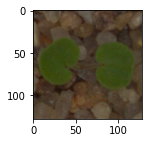

1/1 [==============================] - 1s 518ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


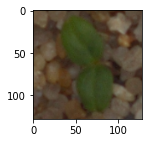

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Cleavers']
True Label Cleavers


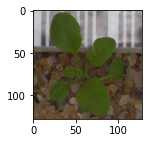

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


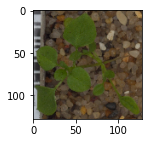

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Charlock']
True Label Common Chickweed


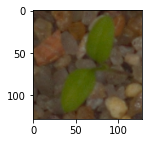

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


In [54]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])   

plt.figure(figsize=(2,2))
plt.imshow(X_test[58])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[58].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[58]) 

plt.figure(figsize=(2,2))
plt.imshow(X_test[105])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[105].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[105]) 

From the random 5 images the 2 are predicted wrong. 

# **Conclusion**

* We can observe from the confusion matrix of all the models that our VGG16 model was the best model because it predicted the majority of the classes better than the other models.
* The test accuracy of the VGG16 model is 75% but from second model looks slightly better.
* Data Augmentation has also helped in improving the model.
* Normally employing the transfer learning model can produce a better outcome than any ordinary CNN. In our situation and after try several compination we see that The CNN Model with Data Augmentation performs better in terms of accuracy.

In [56]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],
              'Train Accuracy':['72%','79%','85%'],
              'Validation Accuracy':['75%','83%','74%'],
              'Test Accuracy':['76%','83%','74%']})


,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,72%,75%,76%
1,CNN Model with Data Augmentation,79%,83%,83%
2,Transfer Learning Model,85%,74%,74%


## **Scope of Improvement**

* These models can be further improved by training with different filter sizes and different number of filters.
* Change the values of epochs could also improve in some cases the results too.
* Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
* Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.


# **Happy Learning!**